# Project 2: Image Stitcher
## Assigned: 02.01.2019
## Due Date: TBD (probably 02.20.2019)

Panoramic photography is ubiquitous, with nearly every digital camera having a mode dedicated to doing it.  Here's an example from the Italian Alps:
<img src="pano.jpg">
Note the extreme aspect ratio: much larger than the 4:3 or 3:2 that is typical of most cameras; suffice to say, the camera that stook this picture did not have a sensor that was this wide.  So how are these things made?  Stated simply, multiple images are taken, mutually identifiable points are located in each of these images, and the images are warped such that these points are coincident.  The matching stage might look like this:
<img src="office.jpeg">

For this project, you will code your own image stitcher from scratch.  Despite the conceptual simplicity of this operation, there are a surprising number of challenges that need to be addressed.  A general framework for a stitcher might look like this:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import skimage.transform as skt
from math import floor, exp, sqrt
from PIL import Image
from project2 import *


def stitch(I1, I2):
    H1 = harris_response(I1)
    H2 = harris_response(I2)

    m1 = local_maxima(H1, 3, 3)
    m2 = local_maxima(H2, 3, 3)

    blah, x_diff = I1.shape

    matched = match_features(m1, m2, I1, I2, 21)
    amt = len(matched)

    u = [matched[i][0][0] for i in range(amt)]
    v = [matched[i][0][1] for i in range(amt)]

    up = [matched[i][1][0] for i in range(amt)]
    vp = [matched[i][1][1] for i in range(amt)]

    matches = [ [u[i], v[i], up[i], vp[i] ] for i in range(amt)]

    H_best, inliers = RANSAC(1000, matches, n=4, r=3, d=10)

    # Create a projective transform based on the homography matrix $H$
    proj_trans = skt.ProjectiveTransform(H_best)

    # Warp the image into image 1's coordinate system
    I2_prime = skt.warp(I2, proj_trans)
    
    plt.imshow(I1, alpha=0.5)
    plt.imshow(I2_prime, alpha=0.5)
    plt.show()
    
    return


We will populate these functions over the next several weeks, a process that will involve delving into some of the most elementary operations in digital signal processing.  

As a test case, apply your stitcher to at least four overlapping images that you've taken.  With a stitcher that works on two images, more images can be added by applying the method recursively.

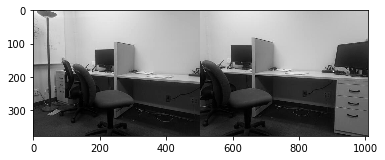

In [2]:
I1 = plt.imread('3.jpg')
I2 = plt.imread('4.jpg')

I1 = I1.mean(axis=2) # Use this if the image is RGB
I2 = I2.mean(axis=2)

I = np.concatenate((I1, I2), axis=1)

plt.imshow(I, cmap=plt.cm.gray)
plt.show()


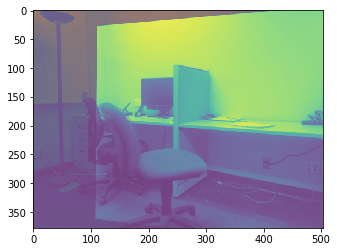

In [3]:
stitch(I1, I2)
